In [1]:
# import libraries
import pandas as pd
import psycopg2
import config
import matplotlib.pyplot as plt

import numpy as np
from scipy import stats

In [2]:
# establish a connection to PostgreSQL database
conn= psycopg2.connect(
    host='localhost',
    database='olympics',
    user=config.Username,
    password=config.Password
)

In [3]:
# Query the database with inner join and read into a DataFrame
query = '''
SELECT cs.country, cs.region, cs.population, cs.gdp, co.summer_total, co.winter_total, co.total_participation, co.total_won
FROM country_socioeconomic AS cs
INNER JOIN country_olympics AS co
ON cs.country = co.country
'''
df = pd.read_sql(query, conn)

In [4]:
# Close the database connection
conn.close()

In [5]:
# Explore and analyze the data
df.head()

,country,region,population,gdp,summer_total,winter_total,total_participation,total_won
0,Afghanistan ...,SouthernAsia ...,35530,20270,2,0,15,2
1,Algeria ...,NorthernAfrica ...,41318,164779,17,0,17,17
2,Argentina ...,SouthAmerica ...,44271,632343,77,0,45,77
3,Armenia ...,WesternAsia ...,2930,10529,18,0,15,18
4,Australia ...,Oceania ...,24451,1230859,547,19,47,566


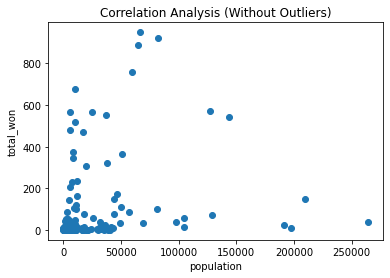

In [6]:

# Calculate the z-scores for population and total_won columns
z_scores_population = np.abs(stats.zscore(df['population']))
z_scores_total_won = np.abs(stats.zscore(df['total_won']))

# Set a threshold for the z-scores
threshold = 3

# Remove outliers based on the z-scores
df_no_outliers = df[(z_scores_population < threshold) & (z_scores_total_won < threshold)]

# Scatter plot without outliers
plt.scatter(df_no_outliers['population'], df_no_outliers['total_won'])
plt.xlabel('population')
plt.ylabel('total_won')
plt.title('Correlation Analysis (Without Outliers)')
plt.show()


In [7]:
# Correlation coefficient between population and total medals won
correlation = df['population'].corr(df['total_won'])
correlation

0.23807020111614915

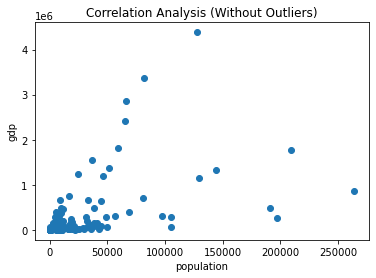

In [8]:

# Calculate the z-scores for population and total_won columns
z_scores_population = np.abs(stats.zscore(df['population']))
z_scores_total_won = np.abs(stats.zscore(df['gdp']))

# Set a threshold for the z-scores
threshold = 3

# Remove outliers based on the z-scores
df_no_outliers = df[(z_scores_population < threshold) & (z_scores_total_won < threshold)]

# Scatter plot without outliers
plt.scatter(df_no_outliers['population'], df_no_outliers['gdp'])
plt.xlabel('population')
plt.ylabel('gdp')
plt.title('Correlation Analysis (Without Outliers)')
plt.show()

In [9]:
# Correlation coefficient between population and gdp
correlation = df['population'].corr(df['gdp'])
correlation

0.5473158338364165

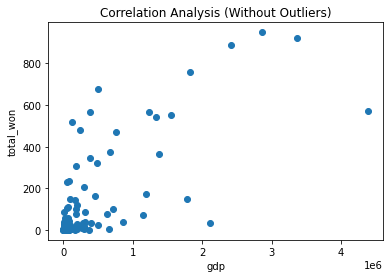

In [10]:
# Calculate the z-scores for population and total_won columns
z_scores_population = np.abs(stats.zscore(df['gdp']))
z_scores_total_won = np.abs(stats.zscore(df['total_won']))

# Set a threshold for the z-scores
threshold = 3

# Remove outliers based on the z-scores
df_no_outliers = df[(z_scores_population < threshold) & (z_scores_total_won < threshold)]

# Scatter plot without outliers
plt.scatter(df_no_outliers['gdp'], df_no_outliers['total_won'])
plt.xlabel('gdp')
plt.ylabel('total_won')
plt.title('Correlation Analysis (Without Outliers)')
plt.show()

In [11]:
# Correlation coefficient between gdp and total medals won
correlation = df['gdp'].corr(df['total_won'])
correlation

0.8490150662098183

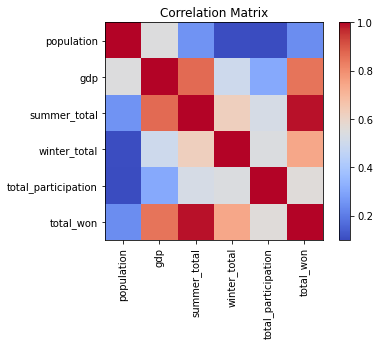

In [38]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix as a heatmap
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()